<a href="https://colab.research.google.com/github/mbjallow6/hello-world/blob/master/social_network_influence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import required libraries

import numpy as np
import networkx as nx
import networkx.algorithms.community as nx_com
import networkx.algorithms.centrality as nx_cen
import random 
import copy
import math
import csv
import matplotlib.pyplot as plt
from random import uniform, seed
import pandas as pd
import time
from collections import Counter
%matplotlib inline

from google.colab import files
uploaded = files.upload()


Saving dolphin_csv.csv to dolphin_csv.csv


In [2]:
# I defined two helper fucntions for data 
# procecessing
# get files as csv and return a dataframe
# with pandas, dataframes and numpy arrays 
# are more easier to work with

def get_df_files(file_name):

  df_data = pd.read_csv(file_name)
  return df_data

dolphin_df = get_df_files('dolphin_csv.csv') 
dolphin_df 


,source,target
0,CCL,Double
1,DN16,Feather
2,DN21,Feather
3,Beak,Fish
4,Bumper,Fish
...,...,...
154,Topless,Zap
155,Ripplefluke,Zig
156,Bumper,Zipfel
157,SN4,Zipfel


In [3]:
# karate network dataset
edge_list = [(1, 0), (2, 0), (2, 1), (3, 0), (3, 1), (3, 2),
                 (4, 0), (5, 0), (6, 0), (6, 4), (6, 5), (7, 0), (7, 1),
                 (7, 2), (7, 3), (8, 0), (8, 2), (9, 2), (10, 0), (10, 4),
                 (10, 5), (11, 0), (12, 0), (12, 3), (13, 0), (13, 1), (13, 2),
                 (13, 3), (16, 5), (16, 6), (17, 0), (17, 1), (19, 0), (19, 1),
                 (21, 0), (21, 1), (25, 23), (25, 24), (27, 2), (27, 23),
                 (27, 24), (28, 2), (29, 23), (29, 26), (30, 1), (30, 8),
                 (31, 0), (31, 24), (31, 25), (31, 28), (32, 2), (32, 8),
                 (32, 14), (32, 15), (32, 18), (32, 20), (32, 22), (32, 23),
                 (32, 29), (32, 30), (32, 31), (33, 8), (33, 9), (33, 13),
                 (33, 14), (33, 15), (33, 18), (33, 19), (33, 20), (33, 22),
                 (33, 23), (33, 26), (33, 27), (33, 28), (33, 29), (33, 30),
                 (33, 31), (33, 32)]
karate_df = pd.DataFrame(edge_list, columns=['source', 'target'])


In [4]:
# i defined another helper function to convert a dataframe
# to a numpy array.
# this function can be use to create an adjecency matrix for our dummy data
def get_matrix_data(dolphin_df):

  df = pd.crosstab(dolphin_df.source, dolphin_df.target)
  idx = df.columns.union(df.index)
  df = df.reindex(index=idx, columns=idx, fill_value=0)
  matrix_data = df.to_numpy()
  return matrix_data




In [5]:
# dolphin network
dolphin_data = get_matrix_data(dolphin_df)

In [6]:
karate_data = get_matrix_data(karate_df)
len(karate_data)

34

In [7]:
# dummy netwrok generator

def generate(kout):
    nodes = 128; # the  number    of    nodes;
    nc = 4; # the    number    of    clusters;
    k = 16; # the    average    overall    degree    of    each    node;

    nm = nodes / nc;
    pin = float(k - kout)/(nm - 1);
    pout = float(kout)/ (nm * (nc - 1));

    y0 = np.zeros([nodes,nodes]);
    count = 1;

    for i in range(nodes):
        if i >= nm * count:
            count+=1

        for j in range(i+1,nodes):

            if j <= nm * count:
                p0 = pin
            else:
                p0 = pout
            if (random.random()<= p0):
                y0[i,j] = 1

    return (y0 + y0.T)

a = generate(0.5)
type(a)
a.shape

(128, 128)

In [8]:
df = pd.crosstab(dolphin_df.source, dolphin_df.target)
idx = df.columns.union(df.index)
df = df.reindex(index=idx, columns=idx, fill_value=0)
a_mat = df.to_numpy()
print(len((a_mat)))


62


In [9]:
# I use this function a create a graph 
# pass the numpy array generate by the function above
def create_Graph(graph_data):
  G= nx.from_numpy_matrix(graph_data)
  return G



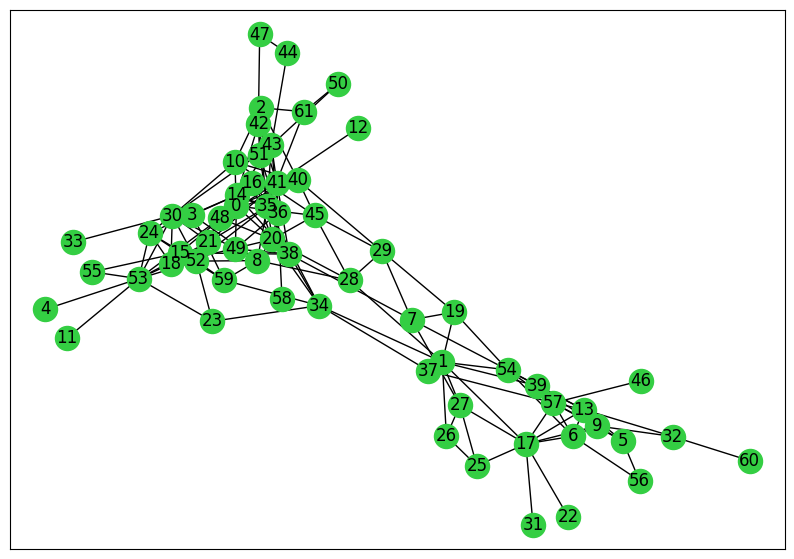

In [10]:
# ploting dolphine network graph
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (10, 7)})
dolphine_graph = create_Graph(dolphine_data)
nx.draw_networkx(dolphine_graph,node_color='#34CE43')
plt.show()

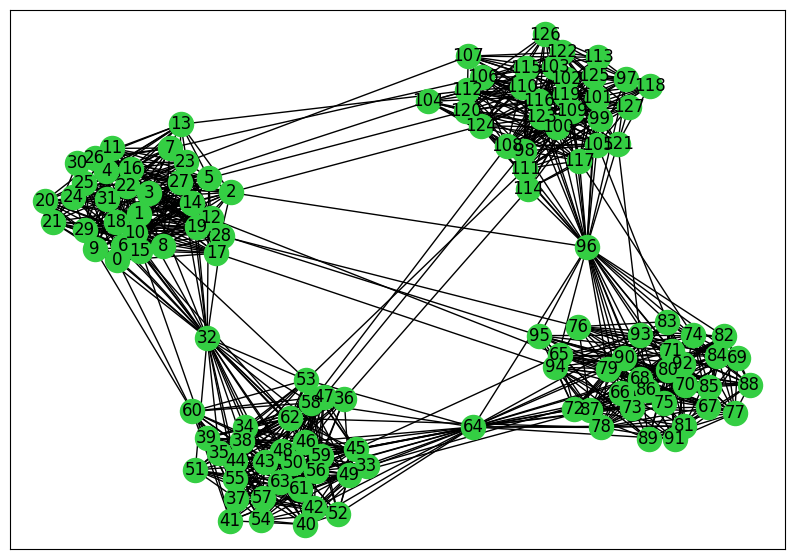

In [11]:
# ploting dummy network graph
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (10, 7)})
dummy_graph = create_Graph(a)
nx.draw_networkx(dummy_graph,node_color='#34CE43')
plt.show()

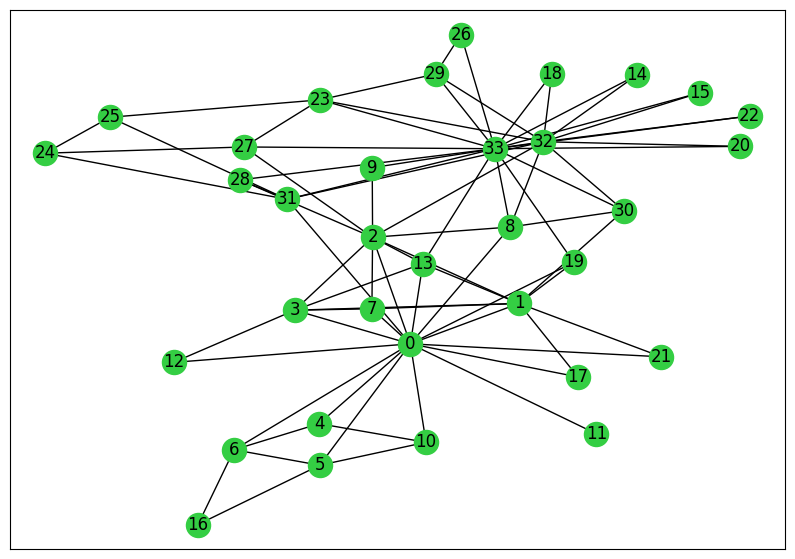

In [12]:
# ploting karate network graph
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (10, 7)})
karate_graph = create_Graph(karate_data)
nx.draw_networkx(karate_graph,node_color='#34CE43')
plt.show()

In [14]:
#  in the following lines of code,i use the networkx
# library to explore the built in community detection fucntions
#  you can observe that each function has a separate definition 
#  depending on their objective function, the pertition the graph
# into various community sizes
girvanNewman_communities = nx_com.girvan_newman(dolphine_graph)
top_level_communities = next(girvanNewman_communities)
next_level_communities = next(girvanNewman_communities)
print(len(sorted(map(sorted,next_level_communities))))

3


In [15]:
grModularity_communities = list(nx_com.greedy_modularity_communities(dolphine_graph))
print(len(grModularity_communities))

4


In [16]:
k_Clique_communities = list(nx_com.k_clique_communities(G=dolphine_graph, k=5))
print(len(k_Clique_communities))

2


In [17]:
# helper function to build graph of a dummy data
# not necessary but helpful
def buildG(G, file_):
    row,column=file_.shape
    for i in range(row):
        for j in range(column):
            if file_[i, j] == 1:
                
                G.add_edge(i, j)


In [18]:
# Function to intialize the start population
def initial_pop(G,n,pop,Alpha): 
    x=np.zeros([pop,n])
    for i in range(pop):
        x[i]=range(1,n+1)
    for i in range(pop):
        t=0
        while t<=n*Alpha:
            r=random.randint(1,n)
            if r in G.nodes():
                ider=x[i][r-1]
                neighbors=list(G.edges(r))
                for j in range(len(neighbors)):
                    neighbor=neighbors[j][1]
                    x[i][neighbor-1]=ider
                t+=1
    return x

In [19]:
# Helper function to update the population after each generation
def UpdataPopulation(init_population,matrix_,children,best_candidate):
    row,column=init_population.shape
  
    new_pop = np.zeros([row,column])
    # print(len(new_pop))
    all_pop = np.zeros([row+len(children)+len(best_candidate),column])
    # print(len(all_pop))
    all_pop[0:row]=init_population
    all_pop[row:row+len(children)]=children
    all_pop[-1]=best_candidate
    neighbor_nodes = np.zeros([1,len(all_pop)])
    for i in range(len(all_pop)):
        neighbor_nodes[0][i]=fitness(init_population,all_pop[i])
    Sort_neighbors = np.argsort(neighbor_nodes[0])
    t=-1
    for i in range(len(new_pop)):
        new_pop[i]=all_pop[Sort_neighbors[t]]
        t-=1
    return new_pop

In [20]:
# this functions returns the nodes selected as influencial seeds
def GetCommunity(mating_nodes):
    community_seeds = []
    cluster=()
    
    for i in range(len(mating_nodes)):
        V=()
        ider=mating_nodes[i]
        if ider in cluster:
            continue
        else:
            cluster+=(ider,)
            V+=(i,)
        for j in range(i+1,len(mating_nodes)):
            if mating_nodes[j]==ider:
                V+=(j,)
        community_seeds.append(V)
    return community_seeds

In [21]:
# A helper function to compare the nodes with the best fitness
def FindBest(children,matrix):
    best=0
    for i in range(len(children)):
        if fitness(matrix,children[i])> fitness(matrix,children[best]):
            best=i
    return children[best]

In [22]:
# This function is very important in this algorithm.
# i reduces the search space by eliminating neightbor nodes.
def FindNeighbors(mating_nodes):
    community_seeds = GetCommunity(mating_nodes)
    num_community_seeds = len(community_seeds)
    n=0
    for i in range(num_community_seeds):
        n =n+len(community_seeds[i])
    if (num_community_seeds -1) ==0:
      neighbors = np.empty([n*( num_community_seeds + 1),n])
    else:
      neighbors = np.empty([n*( num_community_seeds-1),n])
    num=0
    for i in range(num_community_seeds):
        for k in range(len(community_seeds[i])):
            for j in range(num_community_seeds):
                if i==j:
                    continue
                else:
                    neighbors[num]=copy.deepcopy(mating_nodes)
                    neighbors[num][community_seeds[i][k]]=mating_nodes[community_seeds[j][0]]
                    num+=1   
    return neighbors

In [23]:
# this function select parent chromosomes for mating
def selection(init_population,matrix,pool,tour):
    row,column =init_population.shape
    parents = np.zeros([pool,column])
    for i in range(pool):
        a=random.randint(0,row-1)
        for j in range(tour):
            b=random.randint(0,row-1)
            if fitness(matrix,init_population[a])<fitness(matrix,init_population[b]):
                best=b
            else:
                best=a
        parents[i]=init_population[best]
    return parents

In [24]:
# the crosmutate takes two pairs of chromosomes 
# returns offsrpings of the paired chromosomes
def CrossMutate(G,parents,cr_prob,m_prob):
    row,column=parents.shape
    for i in range(0,row-1,2):
        r = random.random()
        if r<cr_prob:
            Round_1=random.randint(0,column-1)
            c=parents[i].copy()
            cluster1=parents[i+1][Round_1]
            for j in range(0,column-1):
                if parents[i+1][j]==cluster1:
                    parents[i][j]=cluster1
            Round_2=random.randint(0,column-1)
            cluster2=c[Round_2]
            for j in range(0,column-1):
                if c[j]==cluster2:
                    parents[i+1][j]=cluster2
        rr=random.random()
        if rr < m_prob: 
            r1 = random.randint(0, row - 1)
            for i in range(column):
                r2 = random.randint(0, column - 1)
                neighbors = list(G.edges(r2))
                r3 = random.randint(0, len(neighbors) - 1)
                neighbor = neighbors[r3][1]
                parents[r1][r2] = parents[r1][neighbor]
    return parents

In [25]:
# the fitness function evaluates the nodes with best fitness
# matrix represent all nodes
# population represent the best nodes
def fitness(matrix,population):
    bw=matrix.sum(axis=1)
    community_seeds=GetCommunity(population)

    mod=0.0
    for i in range(len(community_seeds)):
        # print('commm', community_seeds[i])
        com=0.0
        cut=0.0
        for j in range(len(community_seeds[i])):
            com1=0.0  
            for member in range(len(community_seeds[i] )):#
                com1+=matrix[community_seeds[i][j],community_seeds[i][member]]
            com+=com1
            cut+=(bw[community_seeds[i][j]]-com1)
        mod+=((com-cut)/len(community_seeds[i]))
    return mod

In [43]:
# main function
# using dolphine graph
def evolution(max_gen,num_nodes, pop_size, tour, cross_prob= 0.8, mutate_prob= 0.2, Alpha = 0.2, ):
  
  pool = pop_size//2
  data = dolphine_data
  A=data 
  G=nx.Graph()
  buildG(G,data)
  population=initial_pop(G,num_nodes,pop_size,Alpha) #initial population
  t=0     #start generation from zero to the number specify
  BestPop=np.zeros([max_gen,num_nodes])
  timelapse = []
  # try:
  while t<max_gen:
      start_time = time.time()
      parents=selection(population,A,pool,tour)
      children=CrossMutate(G,parents,cross_prob,mutate_prob)
      Bestchild=FindBest(children,A)
      IsLocal=False
      while not IsLocal:
          L=FindNeighbors(Bestchild)
          best=FindBest(L,A)
          if fitness(A,best)>fitness(A,Bestchild):
            Bestchild=best
          else:
            IsLocal=True
      population=UpdataPopulation(population,A,children,Bestchild)
      print ('Generation number: ', t)
      print ('Max fitness for generation: ', t, 'is: ', fitness(A,population[0]))
      BestPop[t]=population[0]
      t+=1
      timelapse.append(time.time()-start_time)
  # except Exception as ex:
  #   print(ex)
  
  FinalResult=FindBest(BestPop,A)
  CommunityPartion=GetCommunity(FinalResult)
  print ('Community partition:',len(CommunityPartion))
  print ('Community partition:',CommunityPartion)
  # print('time_elapse:', timelapse)
  return timelapse

In [62]:
dolphine_evolution = evolution(max_gen=50, num_nodes = 62,pop_size=220,mutate_prob=0.2, tour=2)
dolphine_evolution

Generation number:  0
Max fitness for generation:  0 is:  2.564516129032258
Generation number:  1
Max fitness for generation:  1 is:  0.47540983606557363
Generation number:  2
Max fitness for generation:  2 is:  -36.40116959064328
Generation number:  3
Max fitness for generation:  3 is:  -2.6065573770491803
Generation number:  4
Max fitness for generation:  4 is:  3.066666666666667
Generation number:  5
Max fitness for generation:  5 is:  2.564516129032258
Generation number:  6
Max fitness for generation:  6 is:  3.066666666666667
Generation number:  7
Max fitness for generation:  7 is:  2.564516129032258
Generation number:  8
Max fitness for generation:  8 is:  3.066666666666667
Generation number:  9
Max fitness for generation:  9 is:  2.564516129032258
Generation number:  10
Max fitness for generation:  10 is:  3.066666666666667
Generation number:  11
Max fitness for generation:  11 is:  2.564516129032258
Generation number:  12
Max fitness for generation:  12 is:  3.066666666666667
G

[19.12684416770935,
 1.555694818496704,
 2.710895538330078,
 2.873464345932007,
 2.875124931335449,
 2.8708739280700684,
 2.909853458404541,
 2.866016387939453,
 2.8721442222595215,
 2.876171112060547,
 2.8594963550567627,
 2.8677077293395996,
 2.912057638168335,
 3.0860514640808105,
 2.8700544834136963,
 2.883190631866455,
 2.858445405960083,
 2.137707233428955,
 2.8448092937469482,
 2.888650894165039,
 2.8661270141601562,
 2.877331018447876,
 2.8824973106384277,
 2.8452951908111572,
 2.8820395469665527,
 2.844977855682373,
 2.8582842350006104,
 2.115492105484009,
 2.8858368396759033,
 2.862170934677124,
 2.881629705429077,
 2.8817319869995117,
 2.8820736408233643,
 2.8536198139190674,
 2.8540353775024414,
 2.101881980895996,
 2.773688554763794,
 2.725372314453125,
 2.702632427215576,
 2.063253164291382,
 2.806994915008545,
 2.8551883697509766,
 2.783212661743164,
 2.8190929889678955,
 2.7732415199279785,
 2.780578374862671,
 2.792711019515991,
 2.8212509155273438,
 2.8346376419067383

In [41]:
# dummy evolution
def evolution1(max_gen,num_nodes, pop_size, tour, cross_prob= 0.8, mutate_prob= 0.2, Alpha = 0.2, ):
  
  pool = pop_size//2
  data = generate(0.5)
  # data = matrix_data
  A=data #Graph data,adj_matrix
  G=nx.Graph()
  buildG(G,data)
  population=initial_pop(G,num_nodes,pop_size,Alpha) #initial population
  t=0     #start generation from zero to the number specify
  BestPop=np.zeros([max_gen,num_nodes])
  timelapse = []
  # try:
  while t<max_gen:
      start_time = time.time()
      parents=selection(population,A,pool,tour)
      children=CrossMutate(G,parents,cross_prob,mutate_prob)
      Bestchild=FindBest(children,A)
      IsLocal=False
      while not IsLocal:
          L=FindNeighbors(Bestchild)
          best=FindBest(L,A)
          if fitness(A,best)>fitness(A,Bestchild):
            Bestchild=best
          else:
            IsLocal=True
      population=UpdataPopulation(population,A,children,Bestchild)
      print ('Generation number: ', t)
      print ('Max fitness for generation: ', t, 'is: ', fitness(A,population[0]))
      BestPop[t]=population[0]
      t+=1
      timelapse.append(time.time()-start_time)

  # except Exception as ex:
  #   print(ex)
  FinalResult=FindBest(BestPop,A)
  CommunityPartion=GetCommunity(FinalResult)
  print ('Community partition:',len(CommunityPartion))
  print ('Community partition:',CommunityPartion)
  # print('time_elapse:', timelapse)
  return timelapse

In [63]:
dummy_evolution = evolution1(max_gen=50, num_nodes = 128,pop_size=450,mutate_prob=0.2, tour=2)
dummy_evolution

Generation number:  0
Max fitness for generation:  0 is:  17.203125
Generation number:  1
Max fitness for generation:  1 is:  17.203125
Generation number:  2
Max fitness for generation:  2 is:  59.99092741935484
Generation number:  3
Max fitness for generation:  3 is:  17.203125
Generation number:  4
Max fitness for generation:  4 is:  59.99092741935484
Generation number:  5
Max fitness for generation:  5 is:  17.203125
Generation number:  6
Max fitness for generation:  6 is:  59.99092741935484
Generation number:  7
Max fitness for generation:  7 is:  17.203125
Generation number:  8
Max fitness for generation:  8 is:  59.99092741935484
Generation number:  9
Max fitness for generation:  9 is:  17.203125
Generation number:  10
Max fitness for generation:  10 is:  59.99092741935484
Generation number:  11
Max fitness for generation:  11 is:  17.203125
Generation number:  12
Max fitness for generation:  12 is:  59.99092741935484
Generation number:  13
Max fitness for generation:  13 is:  17

[11.725736379623413,
 14.220677137374878,
 11.283895015716553,
 11.488935232162476,
 15.433003902435303,
 14.553431987762451,
 15.46041464805603,
 13.650221109390259,
 15.523423910140991,
 15.399044275283813,
 15.283987045288086,
 12.68010425567627,
 15.31057357788086,
 12.714347124099731,
 15.526889562606812,
 15.482336044311523,
 15.4691321849823,
 15.412290811538696,
 15.618514776229858,
 13.818102836608887,
 15.488641738891602,
 12.73775339126587,
 15.680864572525024,
 15.69185733795166,
 15.598435401916504,
 12.972452640533447,
 15.577998638153076,
 14.804289102554321,
 15.768185138702393,
 14.987351417541504,
 15.769343614578247,
 15.654371500015259,
 15.843500137329102,
 15.73987627029419,
 15.49547004699707,
 12.774983406066895,
 15.425072431564331,
 15.619621276855469,
 15.54550051689148,
 14.568753719329834,
 15.487602472305298,
 15.332030296325684,
 15.346109628677368,
 12.680806398391724,
 15.238526821136475,
 13.485281229019165,
 15.196420192718506,
 13.363340377807617,
 1

In [39]:
def evolution2(max_gen,num_nodes, pop_size, tour, cross_prob= 0.8, mutate_prob= 0.2, Alpha = 0.2, ):
  
  pool = pop_size//2
  # data = generate(0.5)
  data = karate_data
  A=data #Graph data,adj_matrix
  G=nx.Graph()
  buildG(G,data)
  population=initial_pop(G,num_nodes,pop_size,Alpha) #initial population
  t=0     #start generation from zero to the number specify
  BestPop=np.zeros([max_gen,num_nodes])
  timelapse = []
  # try:
  while t<max_gen:
      start_time = time.time()
      parents=selection(population,A,pool,tour)
      children=CrossMutate(G,parents,cross_prob,mutate_prob)
      Bestchild=FindBest(children,A)
      IsLocal=False
      while not IsLocal:
          L=FindNeighbors(Bestchild)
          best=FindBest(L,A)
          if fitness(A,best)>fitness(A,Bestchild):
            Bestchild=best
          else:
            IsLocal=True
      population=UpdataPopulation(population,A,children,Bestchild)
      print ('Generation number: ', t)
      print ('Max fitness for generation: ', t, 'is: ', fitness(A,population[0]))
      BestPop[t]=population[0]
      t+=1
      timelapse.append(time.time()-start_time)
  # except Exception as ex:
  #   print(ex)
  
  FinalResult=FindBest(BestPop,A)
  CommunityPartion=GetCommunity(FinalResult)
  print ('Community partition:',len(CommunityPartion))
  print ('Community partition:',CommunityPartion)
  # print('time_elapse:', timelapse)
  return timelapse

In [64]:
karate_evolution = evolution2(max_gen=50, num_nodes = 34,pop_size=120,mutate_prob=0.2, tour=2)
karate_evolution

Generation number:  0
Max fitness for generation:  0 is:  2.2941176470588234
Generation number:  1
Max fitness for generation:  1 is:  2.2941176470588234
Generation number:  2
Max fitness for generation:  2 is:  2.9
Generation number:  3
Max fitness for generation:  3 is:  2.2941176470588234
Generation number:  4
Max fitness for generation:  4 is:  2.2941176470588234
Generation number:  5
Max fitness for generation:  5 is:  2.2941176470588234
Generation number:  6
Max fitness for generation:  6 is:  2.2941176470588234
Generation number:  7
Max fitness for generation:  7 is:  2.2941176470588234
Generation number:  8
Max fitness for generation:  8 is:  2.2941176470588234
Generation number:  9
Max fitness for generation:  9 is:  2.2941176470588234
Generation number:  10
Max fitness for generation:  10 is:  2.2941176470588234
Generation number:  11
Max fitness for generation:  11 is:  2.2941176470588234
Generation number:  12
Max fitness for generation:  12 is:  2.2941176470588234
Generati

[0.8338241577148438,
 0.34293413162231445,
 0.3498837947845459,
 0.3737804889678955,
 0.42214536666870117,
 0.4029731750488281,
 0.4261915683746338,
 0.43386340141296387,
 0.4428737163543701,
 0.4151947498321533,
 0.42106032371520996,
 0.4104726314544678,
 0.4209318161010742,
 0.41484880447387695,
 0.4126448631286621,
 0.40347743034362793,
 0.43161511421203613,
 0.39856863021850586,
 0.4284944534301758,
 0.42581939697265625,
 0.416226863861084,
 0.4244811534881592,
 0.41742396354675293,
 0.42011404037475586,
 0.414928674697876,
 0.4082190990447998,
 0.4220719337463379,
 0.40692877769470215,
 0.43241214752197266,
 0.4099464416503906,
 0.43113017082214355,
 0.4170875549316406,
 0.42087602615356445,
 0.41406750679016113,
 0.4220595359802246,
 0.3962676525115967,
 0.42103147506713867,
 0.4093623161315918,
 0.42224860191345215,
 0.40364980697631836,
 0.4213142395019531,
 0.40972328186035156,
 0.44103264808654785,
 0.41766810417175293,
 0.4149775505065918,
 0.4418642520904541,
 0.41697239875

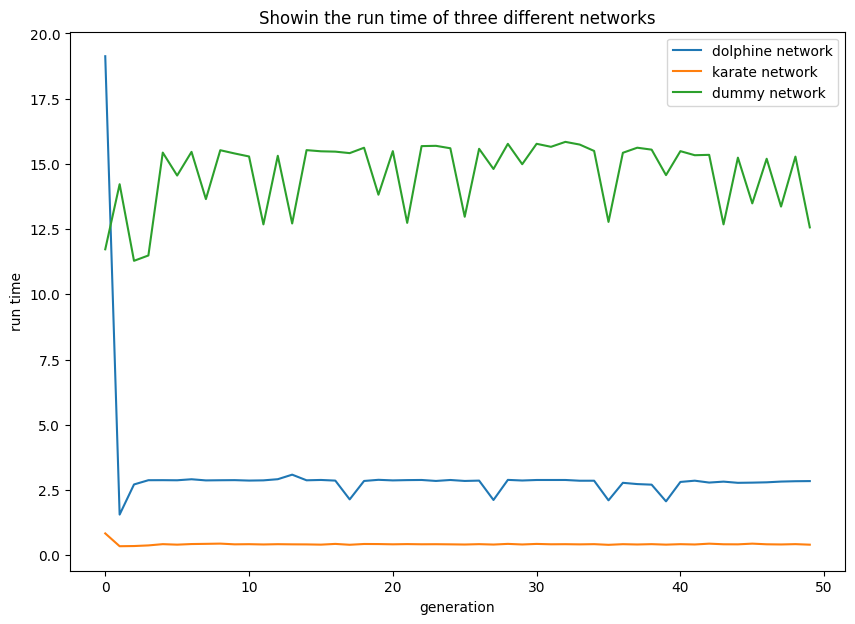

In [65]:
def runtime_plot(x,y,z):
  plt.plot(x, label = 'dolphine network')
  plt.plot(y,  label = 'karate network')
  plt.plot(z, label = 'dummy network')

  plt.xlabel('generation')
  plt.ylabel('run time')

  plt.title('Showing the run time of three different networks')
  plt.legend()
  plt.show()
plot = runtime_plot(dolphine_evolution, karate_evolution,dummy_evolution)
plot
